In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("House Price India.csv")
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [4]:
df.isnull().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [5]:
df.duplicated().sum()

0

In [6]:
df.columns = df.columns.str.lower().str.replace(" ","_")

In [7]:
df.rename(columns = {"area_of_the_house(excluding_basement)":"house_area_excluding_basement"},inplace=True)

In [8]:
df.rename(columns = {"area_of_the_basement":"basement_area"},inplace=True)

In [9]:
df.columns

Index(['id', 'date', 'number_of_bedrooms', 'number_of_bathrooms',
       'living_area', 'lot_area', 'number_of_floors', 'waterfront_present',
       'number_of_views', 'condition_of_the_house', 'grade_of_the_house',
       'house_area_excluding_basement', 'basement_area', 'built_year',
       'renovation_year', 'postal_code', 'lattitude', 'longitude',
       'living_area_renov', 'lot_area_renov', 'number_of_schools_nearby',
       'distance_from_the_airport', 'price'],
      dtype='object')

In [10]:
coore = df.corr().abs()

<Axes: >

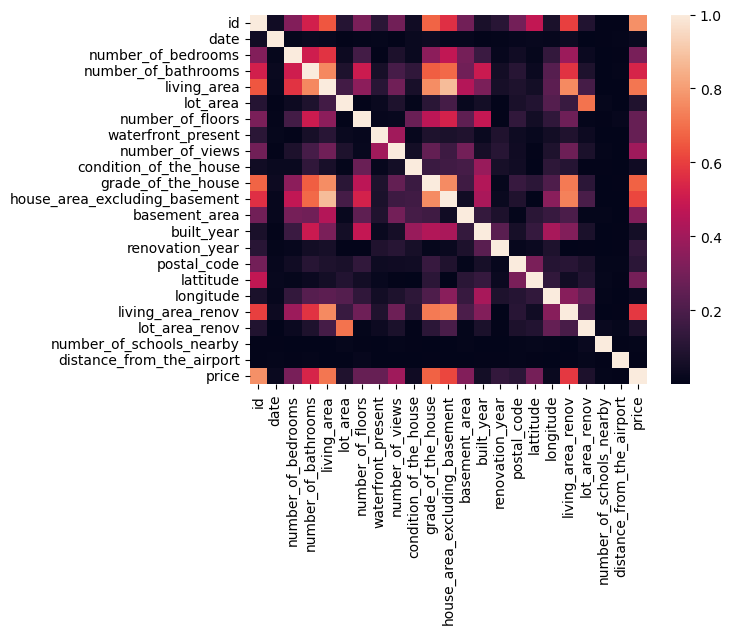

In [11]:
sns.heatmap(coore)

<Axes: >

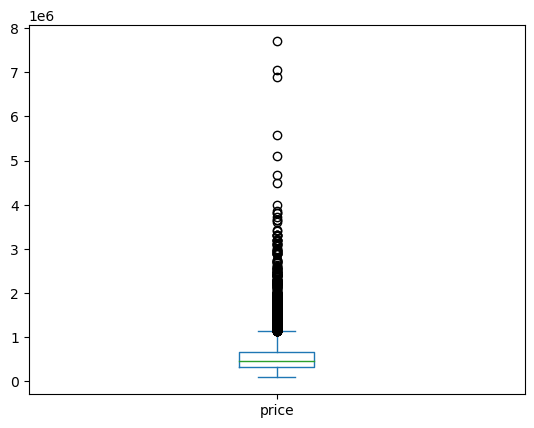

In [12]:
df.price.plot(kind = "box")

In [13]:
q3 = df.price.quantile(0.75)
q1 = df.price.quantile(0.25)
iqr = q3 - q1
max_value = q3 + 1.5 * iqr

max_value

1132500.0

In [14]:
mask_price = df.price <= max_value
df1 = df[mask_price]

df1

,id,date,number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,waterfront_present,number_of_views,condition_of_the_house,...,built_year,renovation_year,postal_code,lattitude,longitude,living_area_renov,lot_area_renov,number_of_schools_nearby,distance_from_the_airport,price
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
5,6762813157,42491,5,3.25,3660,11995,2.0,0,2,3,...,2006,0,122008,52.7637,-114.050,3320,11241,3,72,785000
6,6762813599,42491,3,1.75,2240,10578,2.0,0,0,5,...,1923,0,122006,52.9254,-114.482,1570,10578,3,71,750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14615,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14616,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14617,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


<Axes: >

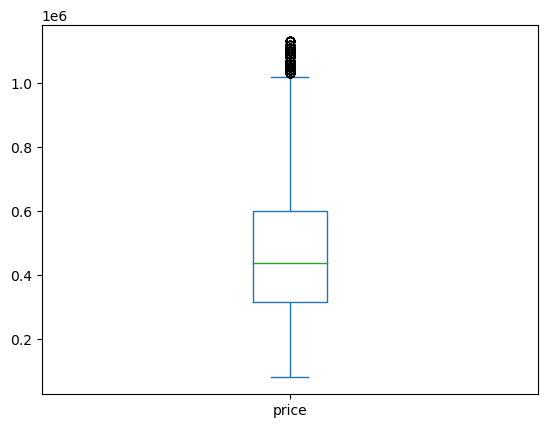

In [15]:
df1.price.plot(kind = "box")

### Splitting the data
- Prediction using no of floors as the predictor(Just one predictor)
<br> X as the predictor(as a dataframe)
<br> y as the value to be predicted(as a series)

In [17]:
X = df1[["number_of_floors"]]
y = df1.price

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [19]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)

y_pred_baseline

[476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,
 476653.0524037161,


In [21]:
mae_baseline = mean_absolute_error(y_train,y_pred_baseline)

mae_baseline

168996.23629773228

### Training and Fitting The Model

In [25]:
lr = LinearRegression()

In [26]:
model = lr.fit(X_train,y_train)

In [27]:
y_train_pred = model.predict(X_train)

In [29]:
mae_train = mean_absolute_error(y_train_pred,y_train)
mae_train

162062.24656790256

### Testing the model

In [32]:
model_test = lr.fit(X_test, y_test)

In [33]:
y_test_pred = model_test.predict(X_test)

In [34]:
mae_test = mean_absolute_error(y_test_pred,y_test)
mae_test

163226.72329939387

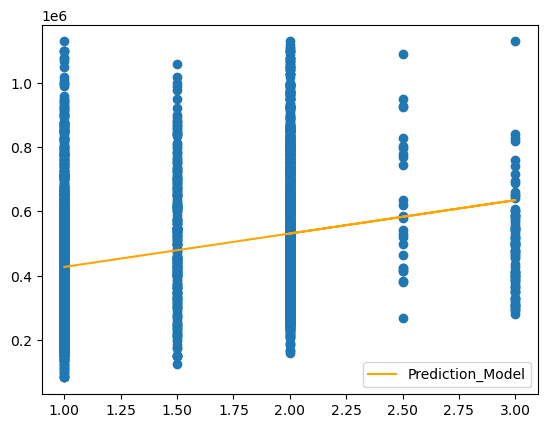

In [35]:
plt.scatter(x= X_test.values, y =y_test)
plt.plot(X_test.values,y_test_pred, color="orange",label="Prediction_Model")
plt.legend();